In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
import setuptools._distutils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.keras.backend.clear_session()


In [2]:
# # # # 40000 COLUMNS
# import data
csv_data = pd.read_csv('../data/Road Accident Data.csv', low_memory=False)
# # print(csv_data)

# clean up typo in data
# # print()
csv_data['Accident_Severity'] = csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'])

# extracting out rows that we want to look at
# # print()
working_data = pd.DataFrame(csv_data[[
    'Day_of_Week',
    'Light_Conditions', 
    'Accident_Severity',  
    'Road_Surface_Conditions', 
    'Speed_limit',
    'Weather_Conditions',
    'Vehicle_Type'
]])

# # print(working_data)

# Show that  data where 'Accident_Severity' is have an unewven distribution where slight is 85% of all data 
# # print()
col = 'Accident_Severity'
unique_values = working_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {working_data[col].value_counts()}")

# seperate data with 'Accident_Severity' Slight from non 'Slight'
# # print()
non_slight_data = working_data[working_data['Accident_Severity'] != "Slight"]
slight_data = working_data[working_data['Accident_Severity'] == "Slight"]

col = 'Accident_Severity'
unique_values = non_slight_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {non_slight_data[col].value_counts()}")
# # print()


unique_values = slight_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {slight_data[col].value_counts()}")

# taking out random 40000 records which data 'Accident_Severity' is 'Slight'
# # print()
slight_data = slight_data.sample(40000)

col = 'Accident_Severity'
unique_values = slight_data[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {slight_data[col].value_counts()}")

# combine the dataframe
# # print()
combined_df = pd.concat([non_slight_data, slight_data], ignore_index=True)
combined_df = combined_df.sample(frac=1)

# # print(combined_df)

# show the end result
# # print()
col = 'Accident_Severity'
unique_values = combined_df[col].unique()
# # print(f"Unique values in '{col}': {unique_values}")
# # print(f"No. of val: {combined_df[col].value_counts()}")


In [3]:
# Assuming 'working_data' is your DataFrame with the required columns
data = combined_df.copy()  # Make a copy of the original DataFrame

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for col in ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
print("==========Train data==========")
y_train_pred = rf_classifier.predict(X_train)

# Evaluate model performance on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Generate classification report and confusion matrix for training data
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix for training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix:")
print(train_conf_matrix)


print()
print("==========Test data==========")
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

==========Train data==========
Train Accuracy: 0.57
Train Classification Report:
              precision    recall  f1-score   support

       Fatal       0.75      0.08      0.14      3201
     Serious       0.57      0.58      0.58     32570
      Slight       0.57      0.62      0.60     31983

    accuracy                           0.57     67754
   macro avg       0.63      0.43      0.44     67754
weighted avg       0.58      0.57      0.56     67754

Train Confusion Matrix:
[[  256  1872  1073]
 [   44 18766 13760]
 [   43 12048 19892]]

==========Test data==========
Accuracy: 0.52
              precision    recall  f1-score   support

       Fatal       0.02      0.00      0.00       752
     Serious       0.52      0.52      0.52      8170
      Slight       0.52      0.57      0.54      8017

    accuracy                           0.52     16939
   macro avg       0.35      0.36      0.35     16939
weighted avg       0.50      0.52      0.51     16939

Confusion Matrix:
[[   

# Implement Neural Networks

In [6]:
# Create a copy of the DataFrame to avoid modifying the original data
encoded_data = combined_df.copy()

# List of categorical columns to encode
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Accident_Severity', 
                        'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']

# Initialize LabelEncoder for each categorical column
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(encoded_data)


Encoded DataFrame:
       Day_of_Week  Light_Conditions  Accident_Severity  \
40712            6                 4                  1   
67455            6                 4                  2   
59544            2                 3                  2   
79937            6                 1                  2   
49801            4                 4                  2   
...            ...               ...                ...   
81207            6                 4                  2   
73270            5                 1                  2   
69160            6                 1                  2   
38656            2                 3                  0   
30264            3                 4                  1   

       Road_Surface_Conditions  Speed_limit  Weather_Conditions  Vehicle_Type  
40712                        0           50                   1             2  
67455                        0           30                   1             2  
59544                        2  

In [7]:
# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.00      0.00       752
           1       0.52      0.52      0.52      8170
           2       0.52      0.57      0.54      8017

    accuracy                           0.52     16939
   macro avg       0.35      0.36      0.35     16939
weighted avg       0.50      0.52      0.51     16939

Confusion Matrix:
[[   1  491  260]
 [  39 4223 3908]
 [  17 3461 4539]]


In [8]:
# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type', 'Accident_Severity']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Convert DataFrame to float dtype (after encoding all categorical variables)
data = data.astype(float)

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure target variable y is numeric
y_train = y_train.astype(int)  # Ensure y_train is of integer dtype
y_test = y_test.astype(int)    # Ensure y_test is of integer dtype

# Initialize Neural Network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(3, activation='softmax'))  # 3 output classes (Fatal, Serious, Slight)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on test data
y_pred_prob = model.predict(X_test_scaled)  # Get the raw probabilities for each class
y_pred = np.argmax(y_pred_prob, axis=1)  # Determine the class with the highest probability

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division=0 to handle division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


C:\Users\noide\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627 (10.26 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4818 - loss: 0.9120 - val_accuracy: 0.5156 - val_loss: 0.8449
Epoch 2/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5141 - loss: 0.8483 - val_accuracy: 0.5142 - val_loss: 0.8441
Epoch 3/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5113 - loss: 0.8417 - val_accuracy: 0.5145 - val_loss: 0.8422
Epoch 4/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5090 - loss: 0.8414 - val_accuracy: 0.5131 - val_loss: 0.8429
Epoch 5/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5168 - loss: 0.8415 - val_accuracy: 0.5108 - val_loss: 0.8429
Epoch 6/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5167 - loss: 0.8400 - val_accuracy: 0.5161 - val_loss: 0.8418
Epoch 7/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5181 - loss: 0.8376 - val_accuracy: 0.5174 - val_loss: 0.8412
Epoch 8/50
1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5199 - loss: 0.83

1906/1906 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5236 - loss: 0.8359 - val_accuracy: 0.5192 - val_loss: 0.8395
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5320 - loss: 0.8260
Test Accuracy: 0.53
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       752
           1       0.53      0.47      0.50      8170
           2       0.52      0.63      0.57      8017

    accuracy                           0.53     16939
   macro avg       0.35      0.37      0.36     16939
weighted avg       0.50      0.53      0.51     16939

Confusion Matrix:
[[   0  470  282]
 [   0 3868 4302]
 [   0 2986 5031]]


In [9]:
print("==========Train data==========")
# Make predictions on training data
y_train_pred_prob = model.predict(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Generate classification report and confusion matrix for training data
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


print()
print("==========Test data==========")
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

==========Train data==========
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Training Accuracy: 0.53
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3201
           1       0.53      0.47      0.50     32570
           2       0.53      0.63      0.57     31983

    accuracy                           0.53     67754
   macro avg       0.68      0.37      0.36     67754
weighted avg       0.55      0.53      0.51     67754

Training Confusion Matrix:
[[    0  2092  1109]
 [    0 15419 17151]
 [    0 11751 20232]]

==========Test data==========
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       752
           1       0.53      0.47      0.50      8170
           2       0.52      0.63      0.57      8017

    accuracy                           0.53     16939
   macro avg    

Random Sample where Accident_Severity is 1.0:
Unique values in 'Day_of_Week': [6. 2. 4. 1. 5. 0. 3.]
No. of val: Day_of_Week
0.0    13751
5.0    12369
4.0    12357
6.0    12248
2.0    11992
1.0    11709
3.0    10267
Name: count, dtype: int64

Unique values in 'Light_Conditions': [4. 3. 1. 2. 0.]
No. of val: Light_Conditions
4.0    60948
1.0    17027
3.0     5649
0.0      762
2.0      307
Name: count, dtype: int64

Unique values in 'Accident_Severity': [1. 2. 0.]
No. of val: Accident_Severity
1.0    40740
2.0    40000
0.0     3953
Name: count, dtype: int64

Unique values in 'Road_Surface_Conditions': [0. 2. 4. 3. 5. 1.]
No. of val: Road_Surface_Conditions
0.0    58255
4.0    22121
2.0     3003
3.0     1137
1.0      110
5.0       67
Name: count, dtype: int64

Unique values in 'Speed_limit': [50. 30. 60. 70. 40. 20.]
No. of val: Speed_limit
30.0    52101
60.0    15743
40.0     6942
70.0     6136
50.0     3002
20.0      769
Name: count, dtype: int64

Unique values in 'Weather_Conditions': 

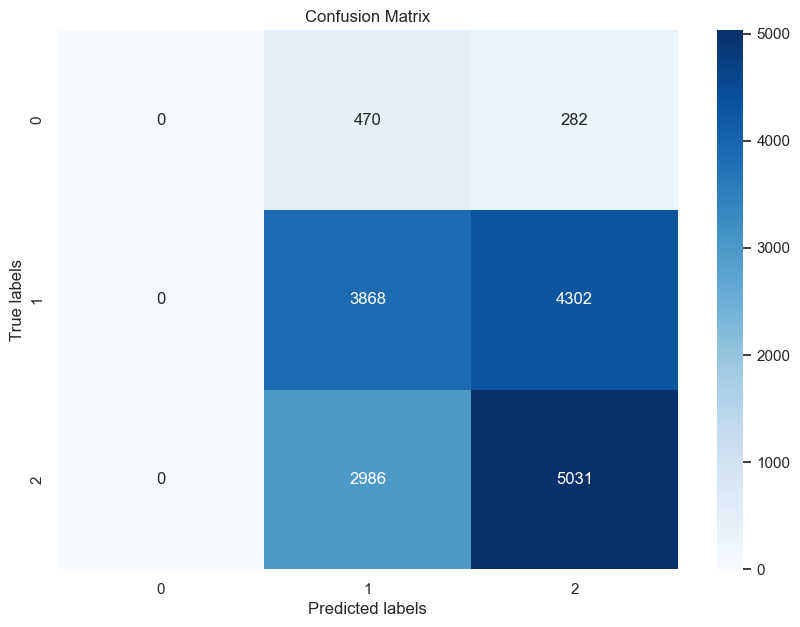

In [10]:
df = pd.DataFrame(data)

df = pd.DataFrame(data)

# Filter the DataFrame to select rows where Accident_Severity is 1.0
filtered_df = df[df['Accident_Severity'] == 2.0]

# Sample 3000 rows randomly from the filtered DataFrame
random_sample_df = filtered_df.sample(n=30, random_state=42)

print("Random Sample where Accident_Severity is 1.0:")
# print(random_sample_df)


for col in data:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")
    print(f"No. of val: {data[col].value_counts()}")
    print()

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()